<a href="https://colab.research.google.com/github/Putrimaesarah/Remdial_Metode-TURF_STATMUL/blob/main/REMEDIAL_STATMUL_TURF_046_PUTRI_MAESARAH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Putri Maesarah

Kelas : 6B

Mata Kuliah : Statistika Multivariat

Remedial Metode TURF


# **Analisis Preferensi Penggunaan Layanan M-Banking dan E-Money di Kalangan Mahasiswa Menggunakan Metode TURF**

In [ ]:
#Install Library
!pip install pingouin
!pip install squarify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.7 MB/s eta 0:00:00


In [ ]:
#Import Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pingouin as pg
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

In [ ]:
data = pd.read_excel("/content/medsos.xlsx")
data.head()

,Nama,Jenis Kelamin,BCA Mobile,Livin’ by Mandiri,BRImo,DANA,OVO,GoPay
0,Irfan Fauzi,Perempuan,1,0,1,0,0,0
1,Lina Baskara,Perempuan,1,0,1,1,1,1
2,Gita Dewi,Laki-laki,0,0,0,0,1,1
3,Hana Juwita,Perempuan,1,1,1,0,0,1
4,Qori Gunawan,Perempuan,0,1,1,1,0,1


In [ ]:
data_path = "/content/medsos.xlsx"
df = pd.read_excel(data_path)

services = ['BCA Mobile', 'Livin’ by Mandiri', 'BRImo', 'DANA', 'OVO', 'GoPay']

print("Jumlah pengguna layanan M-Banking dan E-Money:")

for service in services:
    if service in df.columns:
        total_users = df[service].sum()
        print(f"Jumlah pengguna {service}: {total_users}")
    else:
        print(f"Kolom {service} tidak ditemukan.")


Jumlah pengguna layanan M-Banking dan E-Money:
Jumlah pengguna BCA Mobile: 34
Jumlah pengguna Livin’ by Mandiri: 25
Jumlah pengguna BRImo: 29
Jumlah pengguna DANA: 25
Jumlah pengguna OVO: 20
Jumlah pengguna GoPay: 30


In [ ]:
import pandas as pd
from itertools import combinations

data_path = "/content/medsos.xlsx"
df = pd.read_excel(data_path)

services = ['BCA Mobile', 'Livin’ by Mandiri', 'BRImo', 'DANA', 'OVO', 'GoPay']

combination_counts = {}

# Hitung untuk semua kombinasi ukuran 1 sampai len(services)
for r in range(1, len(services)+1):
    for combo in combinations(services, r):
        # Cari baris yang pakai semua layanan di combo
        count = df[list(combo)].all(axis=1).sum()
        combination_counts[combo] = count

# Sort kombinasi berdasarkan jumlah pengguna terbanyak
sorted_combinations = sorted(combination_counts.items(), key=lambda x: x[1], reverse=True)

print("Kombinasi layanan yang paling banyak digunakan:")

for combo, count in sorted_combinations:
    layanan_str = " + ".join(combo)
    print(f"{layanan_str}: {count} pengguna")

Kombinasi layanan yang paling banyak digunakan:
BCA Mobile: 34 pengguna
GoPay: 30 pengguna
BRImo: 29 pengguna
Livin’ by Mandiri: 25 pengguna
DANA: 25 pengguna
OVO: 20 pengguna
BCA Mobile + BRImo: 20 pengguna
BCA Mobile + GoPay: 19 pengguna
Livin’ by Mandiri + GoPay: 17 pengguna
BRImo + DANA: 17 pengguna
BCA Mobile + DANA: 16 pengguna
BRImo + GoPay: 15 pengguna
BCA Mobile + OVO: 14 pengguna
Livin’ by Mandiri + BRImo: 14 pengguna
DANA + GoPay: 14 pengguna
BCA Mobile + Livin’ by Mandiri: 13 pengguna
Livin’ by Mandiri + DANA: 11 pengguna
BRImo + OVO: 11 pengguna
OVO + GoPay: 11 pengguna
BCA Mobile + BRImo + DANA: 11 pengguna
BCA Mobile + BRImo + GoPay: 10 pengguna
BRImo + DANA + GoPay: 10 pengguna
Livin’ by Mandiri + OVO: 9 pengguna
BCA Mobile + DANA + GoPay: 9 pengguna
DANA + OVO: 8 pengguna
BCA Mobile + Livin’ by Mandiri + BRImo: 8 pengguna
BCA Mobile + Livin’ by Mandiri + GoPay: 8 pengguna
BCA Mobile + BRImo + OVO: 8 pengguna
Livin’ by Mandiri + BRImo + DANA: 8 pengguna
Livin’ by Mandir

In [ ]:
#Jumlah pengguna layanan berdasarkan jenis kelamin
df_laki = df[df['Jenis Kelamin'] == 'Laki-laki']
df_wanita = df[df['Jenis Kelamin'] == 'Perempuan']

print("Jumlah pengguna layanan berdasarkan jenis kelamin:")

for service in services:
    laki_count = df_laki[service].sum()
    wanita_count = df_wanita[service].sum()
    print(f"Laki-laki {service}: {laki_count}")
    print(f"Perempuan {service}: {wanita_count}")


Jumlah pengguna layanan berdasarkan jenis kelamin:
Laki-laki BCA Mobile: 13
Perempuan BCA Mobile: 21
Laki-laki Livin’ by Mandiri: 13
Perempuan Livin’ by Mandiri: 12
Laki-laki BRImo: 16
Perempuan BRImo: 13
Laki-laki DANA: 13
Perempuan DANA: 12
Laki-laki OVO: 11
Perempuan OVO: 9
Laki-laki GoPay: 14
Perempuan GoPay: 16


# VISUALISASI

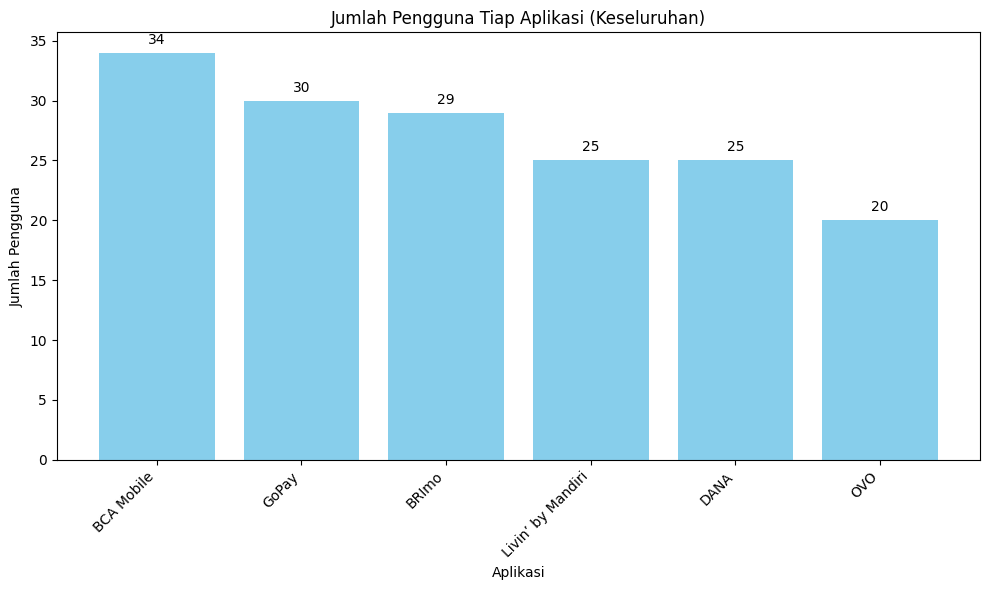

In [ ]:
# Mulai kolom aplikasi dari 'BCA Mobile'
start_index = data.columns.get_loc("BCA Mobile")
app_columns = data.columns[start_index:]

# Hitung jumlah pengguna tiap aplikasi (jumlah baris yang nilai 1)
jumlah_pengguna = data[app_columns].sum().sort_values(ascending=False)

# Visualisasi bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(jumlah_pengguna.index, jumlah_pengguna.values, color='skyblue')

# Beri label angka di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}', ha='center', va='bottom')

plt.title('Jumlah Pengguna Tiap Aplikasi (Keseluruhan)')
plt.xlabel('Aplikasi')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Dari visualisasi ini, dapat dilihat BCA Mobile jadi favorit utama, GoPay dan BRImo juga populer, sementara OVO punya pengguna paling sedikit.

Jumlah pengguna layanan berdasarkan jenis kelamin:
Laki-laki: {'BCA Mobile': np.int64(13), 'Livin’ by Mandiri': np.int64(13), 'BRImo': np.int64(16), 'DANA': np.int64(13), 'OVO': np.int64(11), 'GoPay': np.int64(14)}
Perempuan: {'BCA Mobile': np.int64(21), 'Livin’ by Mandiri': np.int64(12), 'BRImo': np.int64(13), 'DANA': np.int64(12), 'OVO': np.int64(9), 'GoPay': np.int64(16)}


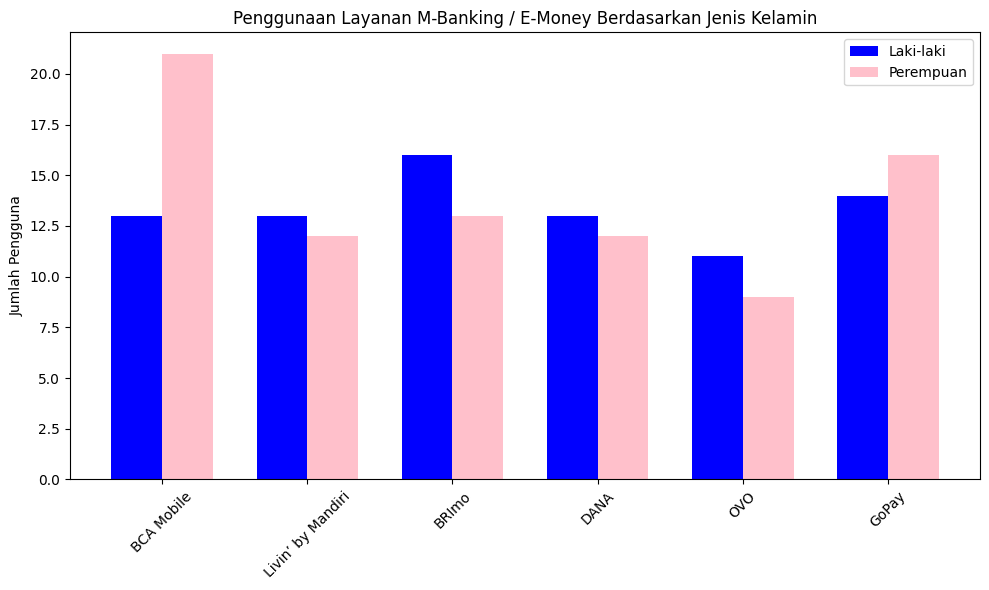

In [ ]:
# Hitung jumlah pengguna tiap layanan untuk laki-laki dan wanita
count_laki = {service: df_laki[service].sum() for service in services}
count_wanita = {service: df_wanita[service].sum() for service in services}

print("Jumlah pengguna layanan berdasarkan jenis kelamin:")
print("Laki-laki:", count_laki)
print("Perempuan:", count_wanita)

# Visualisasi
labels = services
laki_values = [count_laki[s] for s in services]
wanita_values = [count_wanita[s] for s in services]

x = range(len(services))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x, laki_values, width=width, label='Laki-laki', color='blue')
plt.bar([i + width for i in x], wanita_values, width=width, label='Perempuan', color='pink')

plt.xticks([i + width/2 for i in x], labels, rotation=45)
plt.ylabel('Jumlah Pengguna')
plt.title('Penggunaan Layanan M-Banking / E-Money Berdasarkan Jenis Kelamin')
plt.legend()
plt.tight_layout()
plt.show()



Untuk penggunaan M-Banking dan E-Money berdasarkan jenis kelamnin, dapat dilihat perempuan lebih banyak menggunakan layanan BCA Mobile dan GoPay, sementara laki-laki sedikit lebih unggul dalam penggunaan layanan lainnya seperti BRImo dan GoPay.


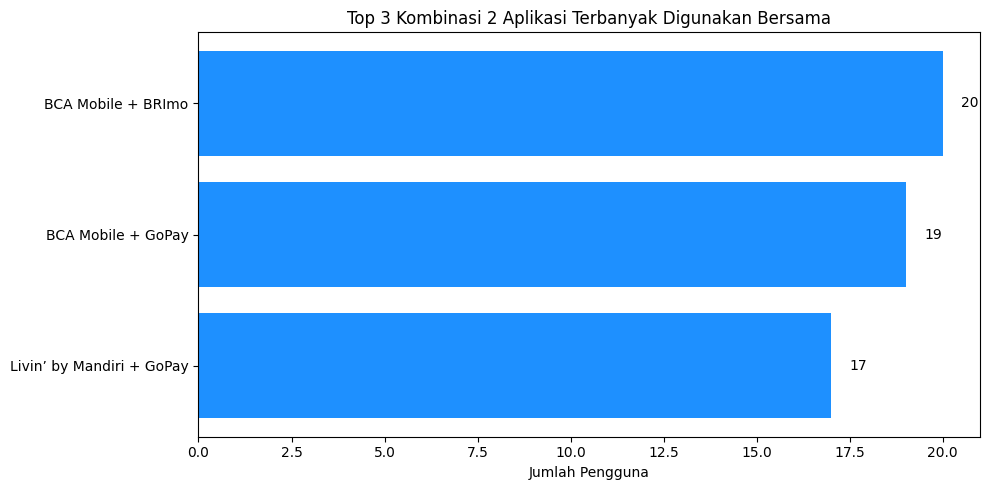

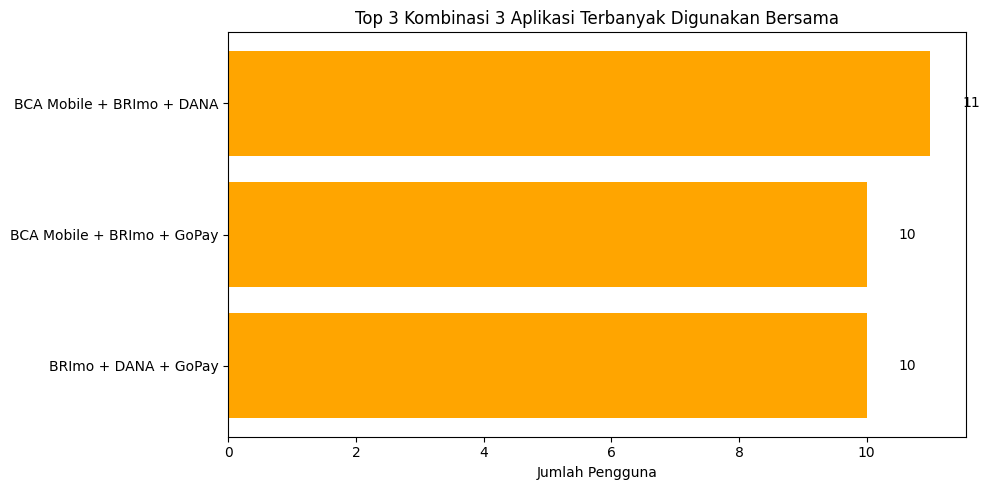

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations


# Mulai kolom aplikasi dari 'BCA Mobile'
start_index = data.columns.get_loc("BCA Mobile")
app_columns = data.columns[start_index:]

def hitung_kombinasi(n):
    combo_counts = {}

    for combo in combinations(app_columns, n):
        count = ((data[list(combo)] == 1).all(axis=1)).sum()
        combo_counts[combo] = count

    combo_df = pd.DataFrame(combo_counts.items(), columns=['Kombinasi', 'Jumlah Pengguna'])
    combo_df = combo_df.sort_values(by='Jumlah Pengguna', ascending=False).head(3)
    combo_df['Label'] = combo_df['Kombinasi'].apply(lambda x: ' + '.join(x))
    return combo_df

# Hitung kombinasi 2 dan 3
top2 = hitung_kombinasi(2)
top3 = hitung_kombinasi(3)

# Visualisasi Top 3 Kombinasi 2 aplikasi
plt.figure(figsize=(10,5))
bars = plt.barh(top2['Label'][::-1], top2['Jumlah Pengguna'][::-1], color='dodgerblue')
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, str(width), va='center')
plt.xlabel('Jumlah Pengguna')
plt.title('Top 3 Kombinasi 2 Aplikasi Terbanyak Digunakan Bersama')
plt.tight_layout()
plt.show()

# Visualisasi Top 3 Kombinasi 3 aplikasi
plt.figure(figsize=(10,5))
bars = plt.barh(top3['Label'][::-1], top3['Jumlah Pengguna'][::-1], color='orange')
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, str(width), va='center')
plt.xlabel('Jumlah Pengguna')
plt.title('Top 3 Kombinasi 3 Aplikasi Terbanyak Digunakan Bersama')
plt.tight_layout()
plt.show()


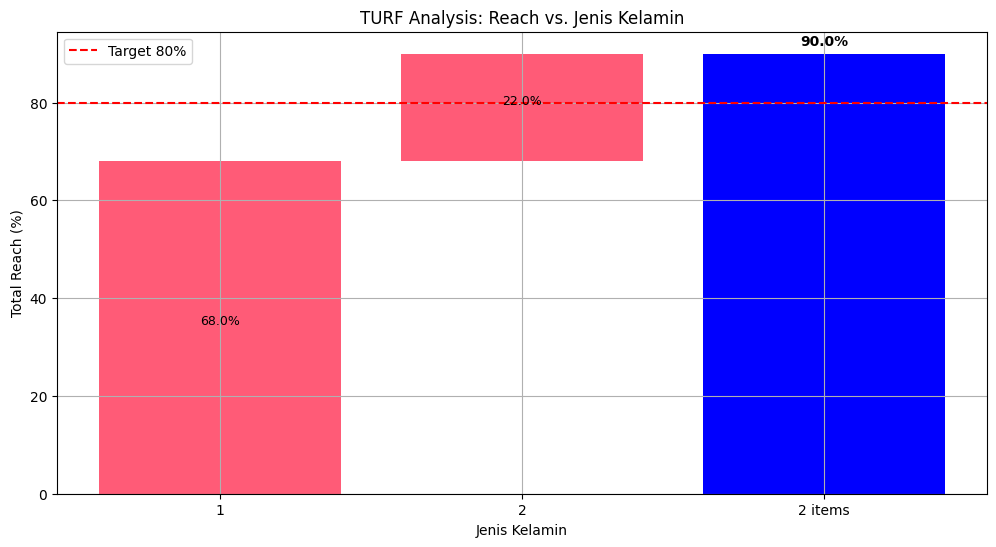

Untuk mencapai minimal 80%, perlu 2 OOH.

 Aplikasi yang banyak digunakan : ['BCA Mobile', 'GoPay']


In [ ]:
# @title Reach vs. Jumlah Iklan
data = "/content/medsos.xlsx" #@param {type:"string"}
Jenis_Kelamin = 'All' # @param ["All", "Perempuan", "Laki-laki"]
Target_dalam_persen = 80 # @param

data_used = pd.read_excel(data)
if Jenis_Kelamin != 'All':
  data_used = data_used[data_used['Jenis Kelamin']==Jenis_Kelamin] #Filter Jenis_Kelamin

if len(data_used)==0:
    raise SystemExit("Data kosong! Program dihentikan.")

target_reach_pct = Target_dalam_persen/100
target_reach = int(target_reach_pct * len(data_used))


index_ = data_used.columns.get_loc("BCA Mobile")   #nomor kolom data
reach_per_item = data_used[data_used.keys()[(index_):]].sum(axis=0).sort_values(ascending=False)   #hitung frekuensi lalu sorting dari yang terbesar

#Algoritma Greedy untuk menemukan kombinasi optimal
selected_items = []
current_reach = set()
reach_progress = []

for item in reach_per_item.index:    #hitung reach
    new_reach = current_reach | set(data_used.index[data_used[item] == 1])  # Tambah reach baru
    selected_items.append(item)
    reach_progress.append(len(new_reach) / len(data_used))  # Simpan progres reach

    if len(new_reach) >= target_reach:
        break  # Selesai jika sudah mencapai target

    current_reach = new_reach  # Perbarui reach

# Hitung incremental reach
incrementals = [reach_progress[0]] + [reach_progress[i] - reach_progress[i-1] for i in range(1, len(reach_progress))]


# Bar chart bertingkat
plt.figure(figsize=(12, 6))
bottoms = 0
for i, inc in enumerate(incrementals):
    plt.bar("{}".format(i+1), inc * 100, bottom=bottoms, color="#ff5b77")
    plt.text(i, bottoms + inc*50, f"{inc*100:.1f}%", ha='center', va='bottom', fontsize=9)
    bottoms += inc * 100
plt.axhline(y=target_reach_pct * 100, color='r', linestyle='--', label=f'Target {target_reach_pct*100:.0f}%')


# Bar terakhir (semua item, misal 50)
total_reach = len(set(data_used.index[data_used[selected_items[-1]] == 1])) / len(data_used)
plt.bar(f"{len(selected_items)} items", reach_progress[-1] * 100, color="blue")
plt.text(len(selected_items), reach_progress[-1] * 100 + 1, f"{reach_progress[-1]*100:.1f}%",
         ha='center', va='bottom', fontsize=10, fontweight='bold')

#Label
plt.xlabel("Jenis Kelamin")
plt.ylabel("Total Reach (%)")
plt.title("TURF Analysis: Reach vs. Jenis Kelamin")
plt.legend()
plt.grid(True)
plt.savefig('reach_vs_ads.png')
plt.show()


#Output hasil
max_reach = max(reach_progress)  # Ubah ke persen

if max_reach>=target_reach_pct:
  print(f"Untuk mencapai minimal {target_reach_pct*100:.0f}%, perlu {len(selected_items)} OOH.")
else:
  print(f"Tidak dapat mencapai {target_reach_pct*100:.0f}%.")
  print(f"maksimal hanya {max_reach*100:.0f}%, dengan {len(selected_items)} OOH")

print("\n Aplikasi yang banyak digunakan :", selected_items[:len(selected_items)])


# KESIMPULAN

**Hasil Analisis Penggunaan Layanan M-Banking dan E-Money**

Dari hasil analisis, layanan M-Banking dan E-Money yang paling banyak digunakan oleh mahasiswa adalah BCA Mobile, diikuti oleh GoPay dan BRImo. Sementara itu, OVO merupakan layanan dengan pengguna paling sedikit. Temuan ini dapat menjadi bahan pertimbangan untuk fokus promosi dan pengembangan layanan ke depan.

Berdasarkan jenis kelamin untuk penggunaan M-Banking dan E-Money, perempuan lebih banyak menggunakan layanan BCA Mobile dan GoPay, sementara laki-laki sedikit lebih unggul dalam penggunaan layanan lainnya seperti BRImo dan GoPay.

Kombinasi layanan yang paling banyak digunakan didominasi oleh BCA Mobile dan BRImo, baik pada kombinasi 2 maupun 3 layanan. Berikut ini top 3 kombinasi pengguna terbanyak yaitu:

**Top 3 kombinasi layanan dengan 2 layanan:**

1. BCA Mobile + BRImo: 20 pengguna

2. BCA Mobile + GoPay: 19 pengguna

3. Livin’ by Mandiri + GoPay: 17 pengguna

**Top 3 kombinasi layanan dengan 3 layanan:**

1. BCA Mobile + BRImo + DANA: 11 pengguna

2. BCA Mobile + BRImo + GoPay: 10 pengguna

3. BRImo + DANA + GoPay: 10 pengguna